In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [26]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [27]:
NUM_CLASSES = 37

# 学習データ読み込み

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 37)                407       
                                                                 
Total params: 1,477
Trainable params: 1,477
Non-trainable params: 0
_________________________________________________________________


In [33]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/40 [=======================>......] - ETA: 0s - loss: 3.6243 - accuracy: 0.0473 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 1s 6ms/step - loss: 3.6215 - accuracy: 0.0477 - val_loss: 3.5853 - val_accuracy: 0.0990
Epoch 2/1000
37/40 [==========================>...] - ETA: 0s - loss: 3.5836 - accuracy: 0.0570
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 3.5814 - accuracy: 0.0610 - val_loss: 3.5519 - val_accuracy: 0.1145
Epoch 3/1000
33/40 [=======================>......] - ETA: 0s - loss: 3.5531 - accuracy: 0.0727
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 3.5491 - accuracy: 0.0728 - val_loss: 3.4978 - val_accuracy: 0.1049
Epoch 4/1000
38/40 [===========================>..] - ETA: 0s - loss: 3.4924 - accuracy: 0.0796


40/40 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.2708
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.2708 - val_loss: 1.7570 - val_accuracy: 0.5003
Epoch 29/1000
 1/40 [..............................] - ETA: 0s - loss: 2.2664 - accuracy: 0.3281
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 2.2769 - accuracy: 0.2684 - val_loss: 1.7352 - val_accuracy: 0.4848
Epoch 30/1000
 1/40 [..............................] - ETA: 0s - loss: 2.3686 - accuracy: 0.2188
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 2.2814 - accuracy: 0.2658 - val_loss: 1.7270 - val_accuracy: 0.4806
Epoch 31/1000
 1/40 [..............................] - ETA: 0s - loss: 2.3444 - accuracy: 0.2266
Epoch 31

26/40 [==================>...........] - ETA: 0s - loss: 2.0733 - accuracy: 0.3230
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 2.0810 - accuracy: 0.3203 - val_loss: 1.5028 - val_accuracy: 0.5528
Epoch 56/1000
 1/40 [..............................] - ETA: 0s - loss: 2.0369 - accuracy: 0.3359
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 2.0727 - accuracy: 0.3211 - val_loss: 1.5099 - val_accuracy: 0.5450
Epoch 57/1000
40/40 [==============================] - ETA: 0s - loss: 2.0772 - accuracy: 0.3064
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 2.0772 - accuracy: 0.3064 - val_loss: 1.4856 - val_accuracy: 0.5617
Epoch 58/1000
40/40 [==============================] - ETA: 0s - loss: 2.0787 - accuracy: 0.3137
Epoch 58

 1/40 [..............................] - ETA: 0s - loss: 1.9405 - accuracy: 0.3438
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.9361 - accuracy: 0.3515 - val_loss: 1.3740 - val_accuracy: 0.6380
Epoch 83/1000
 1/40 [..............................] - ETA: 0s - loss: 1.9821 - accuracy: 0.3750
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.9483 - accuracy: 0.3429 - val_loss: 1.3710 - val_accuracy: 0.6106
Epoch 84/1000
 1/40 [..............................] - ETA: 0s - loss: 1.9112 - accuracy: 0.3516
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.9417 - accuracy: 0.3513 - val_loss: 1.3523 - val_accuracy: 0.6094
Epoch 85/1000
 1/40 [..............................] - ETA: 0s - loss: 1.9329 - accuracy: 0.3281
Epoch 85

37/40 [==========================>...] - ETA: 0s - loss: 1.8603 - accuracy: 0.3818
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 1.8656 - accuracy: 0.3795 - val_loss: 1.2780 - val_accuracy: 0.6607
Epoch 110/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8026 - accuracy: 0.4297
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.8547 - accuracy: 0.3724 - val_loss: 1.2642 - val_accuracy: 0.6714
Epoch 111/1000
 1/40 [..............................] - ETA: 0s - loss: 1.7342 - accuracy: 0.3750
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.8179 - accuracy: 0.3887 - val_loss: 1.2576 - val_accuracy: 0.6589
Epoch 112/1000
38/40 [===========================>..] - ETA: 0s - loss: 1.8445 - accuracy: 0.3801
Ep

Epoch 136/1000
38/40 [===========================>..] - ETA: 0s - loss: 1.7594 - accuracy: 0.4116
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 1.7556 - accuracy: 0.4137 - val_loss: 1.2188 - val_accuracy: 0.6500
Epoch 137/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8063 - accuracy: 0.4062
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.7785 - accuracy: 0.3960 - val_loss: 1.2155 - val_accuracy: 0.6840
Epoch 138/1000
40/40 [==============================] - ETA: 0s - loss: 1.7599 - accuracy: 0.4076
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.7599 - accuracy: 0.4076 - val_loss: 1.2370 - val_accuracy: 0.6434
Epoch 139/1000
38/40 [===========================>..] - ETA: 0s - loss: 1.7331 - accu

Epoch 163/1000
32/40 [=======================>......] - ETA: 0s - loss: 1.6947 - accuracy: 0.4329
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 1.6947 - accuracy: 0.4320 - val_loss: 1.1805 - val_accuracy: 0.6810
Epoch 164/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8179 - accuracy: 0.4219
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.6825 - accuracy: 0.4205 - val_loss: 1.1777 - val_accuracy: 0.6750
Epoch 165/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8151 - accuracy: 0.3750
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.7111 - accuracy: 0.4127 - val_loss: 1.1875 - val_accuracy: 0.6840
Epoch 166/1000
39/40 [============================>.] - ETA: 0s - loss: 1.7217 - accu

Epoch 190/1000
 1/40 [..............................] - ETA: 0s - loss: 1.7581 - accuracy: 0.4375
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.6453 - accuracy: 0.4346 - val_loss: 1.1430 - val_accuracy: 0.6822
Epoch 191/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8147 - accuracy: 0.4141
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.6728 - accuracy: 0.4254 - val_loss: 1.1431 - val_accuracy: 0.6875
Epoch 192/1000
 1/40 [..............................] - ETA: 0s - loss: 1.8473 - accuracy: 0.3594
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
40/40 [==============================] - 0s 2ms/step - loss: 1.6265 - accuracy: 0.4316 - val_loss: 1.1242 - val_accuracy: 0.6726
Epoch 193/1000
 1/40 [..............................] - ETA: 0s - loss: 1.6776 - accu

In [36]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 1ms/step - loss: 1.1386 - accuracy: 0.6756


In [37]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [38]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 46ms/step
[2.46951729e-02 1.03946277e-05 9.57652901e-06 7.21533957e-04
 1.52015358e-01 5.92445023e-02 3.20725441e-02 2.76196361e-01
 3.33877616e-02 5.13896495e-02 2.96332470e-08 1.48058345e-03
 1.84224784e-01 1.13484282e-02 8.79397430e-03 6.53647929e-02
 2.77494993e-02 7.65452171e-07 2.62862977e-06 1.14417599e-05
 1.82301839e-04 1.40277635e-07 2.98922118e-02 1.00206044e-02
 1.03610910e-06 1.84573513e-02 1.44138312e-06 1.52104533e-08
 1.18226315e-04 3.85934673e-03 3.82430386e-07 7.21349614e-04
 1.48926061e-04 6.53324462e-03 1.31886906e-03 1.91228046e-05
 5.64714037e-06]
7


# 混同行列

53/53 [==============================] - 0s 755us/step


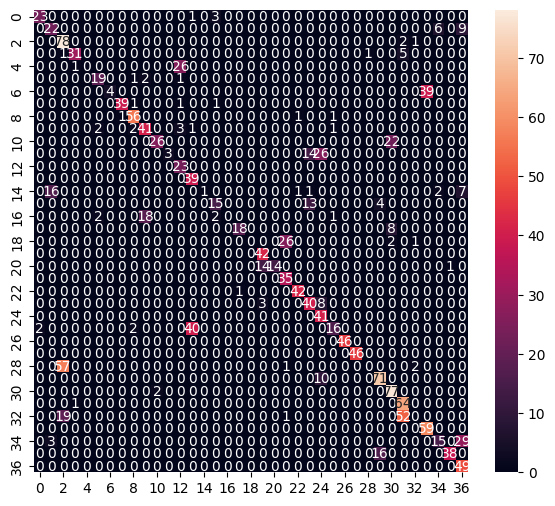

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.54      0.59      0.56        37
           2       0.50      0.96      0.66        81
           3       0.94      0.82      0.87        38
           4       0.00      0.00      0.00        27
           5       0.83      0.83      0.83        23
           6       1.00      0.09      0.17        43
           7       0.97      0.93      0.95        42
           8       0.90      0.95      0.93        59
           9       0.67      0.82      0.74        50
          10       0.93      0.54      0.68        48
          11       1.00      0.07      0.13        43
          12       0.43      1.00      0.60        23
          13       0.48      1.00      0.65        39
          14       1.00      0.04      0.07        28
          15       0.71      0.47      0.57        32
          16       0.00      0.00      0.00        23
     

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [40]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [41]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2023-06-26 23:18:07.945760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_2' with dtype float and shape [?,42]
	 [[{{node input_2}}]]
2023-06-26 23:18:08.022975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,42]
	 [[{{node inputs}}]]
2023-06-26 23:18:08.037744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_2' with dtype float and shape [?,42]
	 [[{{node input_2}}]]
2023-06-26 23:1

INFO:tensorflow:Assets written to: /var/folders/q4/6nwdx2bn09q7z78fwtqxn6hr0000gn/T/tmp2x4ia7uo/assets


INFO:tensorflow:Assets written to: /var/folders/q4/6nwdx2bn09q7z78fwtqxn6hr0000gn/T/tmp2x4ia7uo/assets
2023-06-26 23:18:11.315037: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-26 23:18:11.315057: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-26 23:18:11.315319: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/q4/6nwdx2bn09q7z78fwtqxn6hr0000gn/T/tmp2x4ia7uo
2023-06-26 23:18:11.317102: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-26 23:18:11.317119: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/q4/6nwdx2bn09q7z78fwtqxn6hr0000gn/T/tmp2x4ia7uo
2023-06-26 23:18:11.322986: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-26 23:18:11.367132: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

8024

# 推論テスト

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 358 µs, sys: 133 µs, total: 491 µs
Wall time: 442 µs


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.46951729e-02 1.03946104e-05 9.57651082e-06 7.21532851e-04
 1.52015343e-01 5.92444725e-02 3.20725143e-02 2.76196420e-01
 3.33877541e-02 5.13896607e-02 2.96332523e-08 1.48058380e-03
 1.84224799e-01 1.13484263e-02 8.79397150e-03 6.53647855e-02
 2.77495049e-02 7.65450864e-07 2.62862272e-06 1.14417626e-05
 1.82301985e-04 1.40277251e-07 2.98921876e-02 1.00206006e-02
 1.03610944e-06 1.84573494e-02 1.44138062e-06 1.52104569e-08
 1.18225995e-04 3.85934534e-03 3.82429704e-07 7.21348508e-04
 1.48925814e-04 6.53323717e-03 1.31886813e-03 1.91228064e-05
 5.64713127e-06]
7


In [47]:
import seaborn

In [48]:
import sklearn